In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
url=r'https://raw.githubusercontent.com/anantdivanji/LearnDigital-/main/4th%20Sem/Online%20Sales%20Data.csv'
url

'https://raw.githubusercontent.com/anantdivanji/LearnDigital-/main/4th%20Sem/Online%20Sales%20Data.csv'

In [3]:
df=pd.read_csv(url)
df

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


In [4]:
from datetime import datetime

In [12]:

df['Date'] = df['Date'].astype('datetime64[ns]')
df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Product Category            object
Product Name                object
Units Sold                   int64
Unit Price                 float64
Total Revenue              float64
Region                      object
Payment Method              object
dtype: object

In [14]:
df.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

<Axes: xlabel='Product Category', ylabel='Units Sold'>

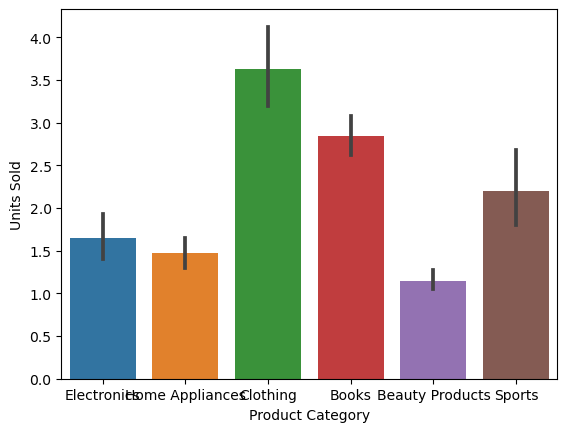

In [16]:
sns.barplot(data=df,x='Product Category',y='Units Sold')

<Axes: xlabel='Total Revenue', ylabel='Region'>

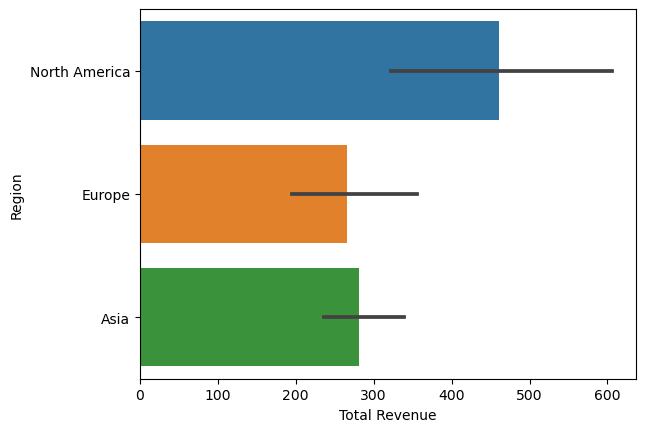

In [17]:
sns.barplot(data=df,x='Total Revenue',y='Region')

<Axes: xlabel='Payment Method', ylabel='Total Revenue'>

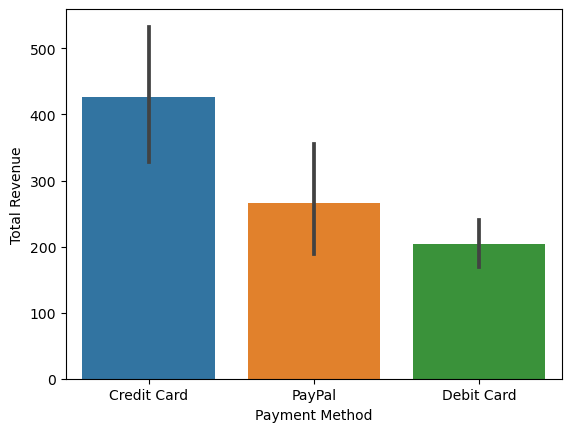

In [19]:
sns.barplot(data=df,x='Payment Method',y='Total Revenue')

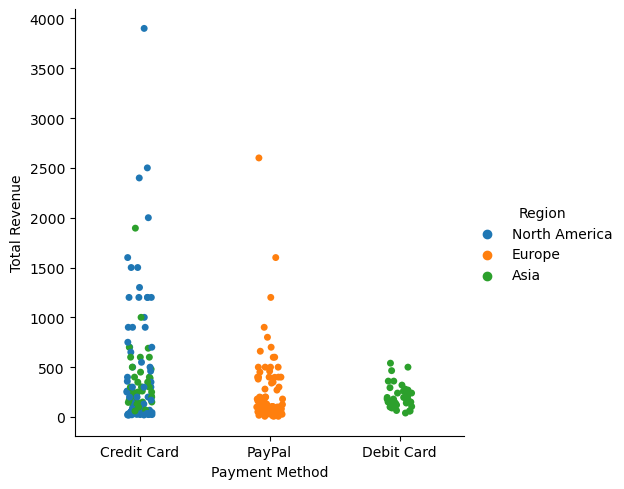

In [21]:
sns.catplot(data=df,x='Payment Method',y='Total Revenue',hue='Region')

<Axes: xlabel='Region', ylabel='Total Revenue'>

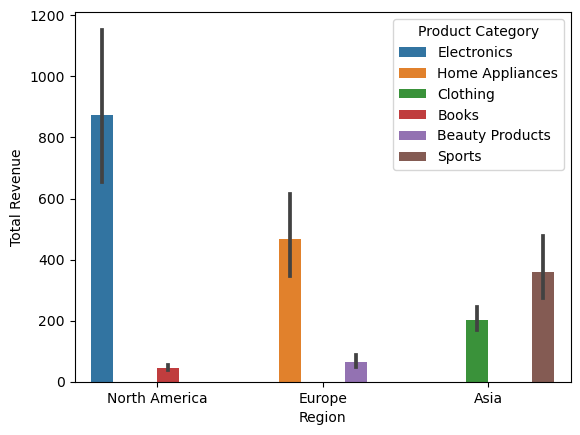

In [23]:
sns.barplot(data=df,x='Region',y='Total Revenue',hue='Product Category')

In [36]:
df=pd.get_dummies(df,dtype='int',drop_first=True)
df

,Transaction ID,Date,Units Sold,Unit Price,Total Revenue,Product Category_Books,Product Category_Clothing,Product Category_Electronics,Product Category_Home Appliances,Product Category_Sports,...,Product Name_Yeti Roadie 24 Cooler,Product Name_Yeti Tundra Haul Portable Wheeled Cooler,Product Name_Youth to the People Superfood Antioxidant Cleanser,Product Name_Zara Summer Dress,Product Name_iPhone 14 Pro,Product Name_iRobot Braava Jet M6,Region_Europe,Region_North America,Payment Method_Debit Card,Payment Method_PayPal
0,10001,2024-01-01,2,4.127171,5.412508,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,10002,2024-01-02,1,1.859495,0.951704,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,10003,2024-01-03,3,-0.090707,0.089217,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,10004,2024-01-04,4,-0.335616,-0.345001,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,10005,2024-01-05,1,0.000000,-0.267591,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,1,0.317475,-0.059418,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
236,10237,2024-08-24,3,0.000045,0.267739,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
237,10238,2024-08-25,3,-0.358293,-0.437162,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
238,10239,2024-08-26,1,-0.158692,-0.371647,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [39]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
rs

RobustScaler()

In [42]:
df[['Unit Price','Total Revenue']]=rs.fit_transform(df[['Unit Price','Total Revenue']])
df


,Transaction ID,Date,Units Sold,Unit Price,Total Revenue,Product Category_Books,Product Category_Clothing,Product Category_Electronics,Product Category_Home Appliances,Product Category_Sports,...,Product Name_Yeti Roadie 24 Cooler,Product Name_Yeti Tundra Haul Portable Wheeled Cooler,Product Name_Youth to the People Superfood Antioxidant Cleanser,Product Name_Zara Summer Dress,Product Name_iPhone 14 Pro,Product Name_iRobot Braava Jet M6,Region_Europe,Region_North America,Payment Method_Debit Card,Payment Method_PayPal
0,10001,2024-01-01,2,4.127171,5.412508,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,10002,2024-01-02,1,1.859495,0.951704,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,10003,2024-01-03,3,-0.090707,0.089217,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,10004,2024-01-04,4,-0.335616,-0.345001,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,10005,2024-01-05,1,0.000000,-0.267591,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,1,0.317475,-0.059418,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
236,10237,2024-08-24,3,0.000045,0.267739,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
237,10238,2024-08-25,3,-0.358293,-0.437162,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
238,10239,2024-08-26,1,-0.158692,-0.371647,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [44]:
x=df.drop(columns='Total Revenue')
x

,Transaction ID,Date,Units Sold,Unit Price,Product Category_Books,Product Category_Clothing,Product Category_Electronics,Product Category_Home Appliances,Product Category_Sports,Product Name_Adidas 3-Stripes Shorts,...,Product Name_Yeti Roadie 24 Cooler,Product Name_Yeti Tundra Haul Portable Wheeled Cooler,Product Name_Youth to the People Superfood Antioxidant Cleanser,Product Name_Zara Summer Dress,Product Name_iPhone 14 Pro,Product Name_iRobot Braava Jet M6,Region_Europe,Region_North America,Payment Method_Debit Card,Payment Method_PayPal
0,10001,2024-01-01,2,4.127171,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,10002,2024-01-02,1,1.859495,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,10003,2024-01-03,3,-0.090707,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,10004,2024-01-04,4,-0.335616,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,10005,2024-01-05,1,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,1,0.317475,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
236,10237,2024-08-24,3,0.000045,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
237,10238,2024-08-25,3,-0.358293,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
238,10239,2024-08-26,1,-0.158692,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [46]:
y=df['Total Revenue']

In [48]:
y

0      5.412508
1      0.951704
2      0.089217
3     -0.345001
4     -0.267591
         ...   
235   -0.059418
236    0.267739
237   -0.437162
238   -0.371647
239   -0.356837
Name: Total Revenue, Length: 240, dtype: float64

In [69]:
df=df.drop(columns='Date')
df

,Transaction ID,Units Sold,Unit Price,Total Revenue,Product Category_Books,Product Category_Clothing,Product Category_Electronics,Product Category_Home Appliances,Product Category_Sports,Product Name_Adidas 3-Stripes Shorts,...,Product Name_Yeti Roadie 24 Cooler,Product Name_Yeti Tundra Haul Portable Wheeled Cooler,Product Name_Youth to the People Superfood Antioxidant Cleanser,Product Name_Zara Summer Dress,Product Name_iPhone 14 Pro,Product Name_iRobot Braava Jet M6,Region_Europe,Region_North America,Payment Method_Debit Card,Payment Method_PayPal
0,10001,2,4.127171,5.412508,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,10002,1,1.859495,0.951704,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,10003,3,-0.090707,0.089217,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,10004,4,-0.335616,-0.345001,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,10005,1,0.000000,-0.267591,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,10236,1,0.317475,-0.059418,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
236,10237,3,0.000045,0.267739,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
237,10238,3,-0.358293,-0.437162,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
238,10239,1,-0.158692,-0.371647,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [71]:
from sklearn.model_selection import train_test_split

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [75]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr


LinearRegression()

In [79]:
lr.fit(x_train,y_train)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>)